<a href="https://colab.research.google.com/github/Bone-Age-Maisha/paper_1/blob/main/pretained_sqexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import cv2
import os
import pandas as pd

In [34]:
import pandas as pd
train_dir = '/content/drive/MyDrive/small_data/train'
df = pd.read_csv('/content/drive/MyDrive/small_data/train_csv1.csv')

In [35]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [36]:
X_train = []
y_age = []
y_gender = []

#df = pd.read_csv('/raid/chenchao/code/BoneAge/BoneAge/data/Training.csv')
a = df.values
m = a.shape[0]

path = train_dir
k = 0
print ('Loading data set...')
k=1
for i in os.listdir(path):
  #print(i)
  if(len(i)>9):   #errror occuring  so to 
    continue
  y_age.append(df.boneage[df.id == int(i[:-4])].tolist()[0])
  a = df.male[df.id == int(i[:-4])].tolist()[0]
  if a:
    y_gender.append(1)
  else:
     y_gender.append(0)
  img_path = path + "/"+i
  img = cv2.imread(img_path)
  #print(img.shape)
  #print (img_path)
  img = cv2.imread(img_path)
    #print (img_path)
    #if(img is not None):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(300,300))
  x = np.asarray(img, dtype=np.uint8)
  X_train.append(x)

Loading data set...


In [37]:
def softlabel(label,num_class):
    softlabel=np.zeros((len(label),num_class))
    ratio = 1.0/50
    for i in range(len(label)):
        for j in range(num_class):
            softlabel[i,j]=1.0 - ratio*np.abs(j-label[i])
    softlabel = np.maximum(softlabel,0)
    return softlabel

In [38]:
y = np.asarray(y_age)
gender = np.asarray(y_gender)
x=np.asarray(X_train, dtype=np.float32)
x/255
gender =2*( gender-0.5)
x_final = []
y_final = []
gender_final = []

# Shuffle images and split into train, validation and test sets
#random_no = np.random.choice(x.shape[0], size=x.shape[0], replace=False)
random_no = np.arange(x.shape[0])
#print(random_no)
np.random.seed(0)
np.random.shuffle(random_no)
for i in random_no:
    x_final.append(x[i,:,:,:])
    y_final.append(y[i])
    gender_final.append(gender[i])

x_final = np.asarray(x_final)
y_final = np.asarray(y_final)
gender_final = np.asarray(gender_final)
print (y_final[:50])
print (gender_final[:50])
k = 10 # Decides split count
x_test = x_final[:k,:,:,:]
y_test = y_final[:k]
gender_test = gender_final[:k]
x_valid = x_final[k:2*k,:,:,:]
y_valid = y_final[k:2*k]
gender_valid = gender_final[k:2*k]
x_train = x_final[2*k:,:,:,:]
y_train = y_final[2*k:]
gender_train = gender_final[2*k:]

## 
#y_test = keras.utils.to_categorical(y_test,240)
#y_train = keras.utils.to_categorical(y_train,240)
#y_valid = keras.utils.to_categorical(y_valid,240)
y_train = softlabel(y_train,240)
y_valid = softlabel(y_valid,240)
y_test = softlabel(y_test,240)
print (y_train)


print ('x_train shape:'+ str(x_train.shape))
print ('y_train shape:'+ str(y_train.shape))
print ('gender_train shape:'+ str(gender_train.shape))
print ('x_valid shape:'+ str(x_valid.shape))
print ('y_valid shape:'+ str(y_valid.shape))
print ('gender_valid shape:' + str(gender_valid.shape))
print ('x_test shape:'+ str(x_test.shape))
print ('y_test shape:'+ str(y_test.shape))


[ 30 149 113 132  33 136 150  94  24  32  60 126  88 174  78  42  21  21
  54  82 192  24  94  32 156 120 165  33 138 156  27 108  42 162  57 126
   4 156 180  88  36 180 132 156 120  60  90 138 138 120]
[-1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.
  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.]
[[0.   0.   0.   ... 0.1  0.08 0.06]
 [0.52 0.54 0.56 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.02 0.04 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
x_train shape:(51, 300, 300, 3)
y_train shape:(51, 240)
gender_train shape:(51,)
x_valid shape:(10, 300, 300, 3)
y_valid shape:(10, 240)
gender_valid shape:(10,)
x_test shape:(10, 300, 300, 3)
y_test shape:(10, 240)


In [39]:
!pip install visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os

In [41]:
base_model11 = ResNet50(weights='imagenet', include_top=False)
base_model11.trainable = True
print("Number of layers in the base model: ", len(base_model11.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model11.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [42]:
for i,layer in enumerate(base_model11.layers):
    print (i,layer.name)
input11 = Input(shape=(300,300,3),name='input1')
input_gender11 = Input(shape=(1,),dtype='float32',name='input2')
output11 = base_model11(input11)
gender_embedding11=Dense(16)(input_gender11)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(3,3))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = keras.layers.Conv2D(256,kernel_size=(1,1))(x)
print (K.int_shape(output11))

0 input_3
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [43]:
sq = keras.layers.GlobalAveragePooling2D()(output11)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output11,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output11,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x11 = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x11))
x11=Flatten()(x11)
f11 = keras.layers.Concatenate(axis=1)([x11,gender_embedding11])
print (K.int_shape(f11)) 
#x = Dense(256, activation='relu')(x)
prediction11 = Dense(240)(f11)

model11 = Model(inputs=[input11,input_gender11], outputs=prediction11)
for i,layer in enumerate(model11.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model11.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

(None, 2048)
(None, 5, 5, 2048)
(None, 1, 1, 2048)
(None, 2064)
0 input1
1 resnet50
2 global_average_pooling2d_10
3 reshape_10
4 dense_14
5 multiply_8
6 add_7
7 batch_normalization_5
8 activation_5
9 block_1
10 max_pooling2d_5
11 input2
12 flatten_3
13 dense_13
14 concatenate_3
15 dense_15


In [44]:
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model11.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

# Save weights after every epoch
#dr='/content/drive/MyDrive/Colab Notebooks/weights'
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
history11=model11.fit([x_train,gender_train],y_train,batch_size=32,epochs=200,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])

Epoch 1/200
2/2 [==============================] - 6s 1s/step - loss: 4.8469 - MAE: 4.8469 - val_loss: 6.9152 - val_MAE: 6.9152
Epoch 2/200
2/2 [==============================] - 1s 283ms/step - loss: 2.7675 - MAE: 2.7675 - val_loss: 5.3097 - val_MAE: 5.3097
Epoch 3/200
2/2 [==============================] - 1s 281ms/step - loss: 1.8542 - MAE: 1.8542 - val_loss: 4.4583 - val_MAE: 4.4583
Epoch 4/200
2/2 [==============================] - 1s 309ms/step - loss: 1.4027 - MAE: 1.4027 - val_loss: 3.9841 - val_MAE: 3.9841
Epoch 5/200
2/2 [==============================] - 1s 303ms/step - loss: 1.1404 - MAE: 1.1404 - val_loss: 3.6661 - val_MAE: 3.6661
Epoch 6/200
2/2 [==============================] - 1s 311ms/step - loss: 0.9286 - MAE: 0.9286 - val_loss: 3.4177 - val_MAE: 3.4177
Epoch 7/200
2/2 [==============================] - 1s 439ms/step - loss: 0.8164 - MAE: 0.8164 - val_loss: 3.2224 - val_MAE: 3.2224
Epoch 8/200
2/2 [==============================] - 1s 405ms/step - loss: 0.6685 - MAE:

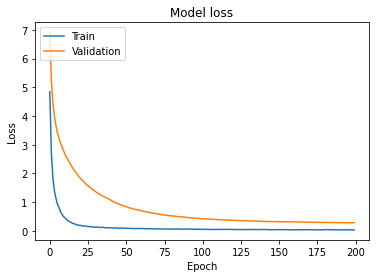

In [45]:
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()